#Processing Data 
This script is used to take all the available data (images, prediction, mean indices and wheater data) and save them into a csv file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
%cd drive/MyDrive/Colab Notebooks/Tesi/glacier_mapping-master/WeatherData/

In [ ]:
%%bash
pip install xarray

In [ ]:
import xarray as xr
import os
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale

In [ ]:
import yaml
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
local_storage_directory = '/content/drive/MyDrive/Colab Notebooks/Tesi/glacier_mapping-master/WeatherData/'

In [ ]:
### Upload images and their prediction
#load images 
y_true = list()
y_pred_tmp = list()
y_pred_tmp1 = list()
y_pred_tmp2 = list()
y_pred_tmp3 = list()
pred_png = list()

# Mean lists
mean_ndvi_ice = list()
mean_ndvi_debris = list()
mean_ndvi_back = list()

mean_ndsi_ice = list()
mean_ndsi_debris = list()
mean_ndsi_back = list()

mean_ndwi_ice = list()
mean_ndwi_debris = list()
mean_ndwi_back = list()

mean_slope_ice = list()
mean_slope_debris = list()
mean_slope_back = list()

mean_elev_ice = list()
mean_elev_debris = list()
mean_elev_back = list()

ice_perc = list()
debris_perc = list()
back_perc = list()

# Indices dictionary
mean_ndvi = dict()
mean_ndsi = dict()
mean_ndwi = dict()
mean_slope = dict()
mean_elevation = dict()
percentage = dict()
mean_ndvi = {0:mean_ndvi_ice,1:mean_ndvi_debris,2:mean_ndvi_back}
mean_ndsi = {0:mean_ndsi_ice,1:mean_ndsi_debris,2:mean_ndsi_back}
mean_ndwi = {0:mean_ndwi_ice,1:mean_ndwi_debris,2:mean_ndwi_back}
mean_slope = {0:mean_slope_ice,1:mean_slope_debris,2:mean_slope_back}
mean_elevation = {0:mean_elev_ice,1:mean_elev_debris,2:mean_elev_back}
percentage = {0:ice_perc,1:debris_perc,2:back_perc}


test_path = "/content/drive/MyDrive/Colab Notebooks/Tesi/glacier_mapping-master/datadrive/glaciers/processed"
true = 'masks'
pred = 'preds2/FPN'
img = 'test'

raw_data = {}
names_images = sorted(os.listdir(os.path.join(test_path,true)))
pred_png = sorted(os.listdir(os.path.join(test_path,pred)))


raw_data['image_name'] = pred_png


#for image in names_images[0:1]:
for image in pred_png:

    path_mask = os.path.join(test_path,true,image.replace("img","mask"))
    mask_open = np.load(path_mask)
    print(image.replace("img","mask"), mask_open.shape)

    path_pred = os.path.join(test_path,pred,image)
    pred_open = np.load(path_pred)
    print(image, pred_open.shape)

    path_image = os.path.join(test_path,img,image)
    img_open = np.load(path_image)
    print(image, img_open.shape)
    
    for glac_class in range(0,3):
      if glac_class == 0:
        mean_ndvi_ice.append(round(minmax_scale(img_open[pred_open==glac_class][:,10], feature_range=(-1, 1)).mean().item(),6))
        mean_ndsi_ice.append(round(minmax_scale(img_open[pred_open==glac_class][:,11], feature_range=(-1, 1)).mean().item(),6))
        mean_ndwi_ice.append(round(minmax_scale(img_open[pred_open==glac_class][:,12], feature_range=(-1, 1)).mean().item(),6))
        mean_elev_ice.append(round(minmax_scale(img_open[pred_open==glac_class][:,13], feature_range=(500, 8000)).mean().item(),6))
        mean_slope_ice.append(round(img_open[pred_open==glac_class][:,14].mean().item(),6))
        ice_perc.append(round((pred_open == glac_class).sum()/(512*512),6))
        mean_ndvi[glac_class] = mean_ndvi_ice
        mean_ndsi[glac_class] = mean_ndsi_ice
        mean_ndwi[glac_class] = mean_ndwi_ice
        mean_elevation[glac_class] = mean_elev_ice
        mean_slope[glac_class] = mean_slope_ice
        percentage[glac_class] = ice_perc
      elif glac_class == 1:
        mean_ndvi_debris.append(round(minmax_scale(img_open[pred_open==glac_class][:,10], feature_range=(-1, 1)).mean().item(),6))
        mean_ndsi_debris.append(round(minmax_scale(img_open[pred_open==glac_class][:,11], feature_range=(-1, 1)).mean().item(),6))
        mean_ndwi_debris.append(round(minmax_scale(img_open[pred_open==glac_class][:,12], feature_range=(-1, 1)).mean().item(),6))
        mean_elev_debris.append(round(minmax_scale(img_open[pred_open==glac_class][:,13], feature_range=(500, 8000)).mean().item(),6))
        mean_slope_debris.append(round(img_open[pred_open==glac_class][:,14].mean().item(),6))
        debris_perc.append(round((pred_open == glac_class).sum()/(512*512),6))
        mean_ndvi[glac_class] = mean_ndvi_debris
        mean_ndsi[glac_class] = mean_ndsi_debris
        mean_ndwi[glac_class] = mean_ndwi_debris
        mean_elevation[glac_class] = mean_elev_debris
        mean_slope[glac_class] = mean_slope_debris
        percentage[glac_class] = debris_perc
      else:
        mean_ndvi_back.append(round(minmax_scale(img_open[pred_open==glac_class][:,10], feature_range=(-1, 1)).mean().item(),6))
        mean_ndsi_back.append(round(minmax_scale(img_open[pred_open==glac_class][:,11], feature_range=(-1, 1)).mean().item(),6))
        mean_ndwi_back.append(round(minmax_scale(img_open[pred_open==glac_class][:,12], feature_range=(-1, 1)).mean().item(),6))
        mean_elev_back.append(round(minmax_scale(img_open[pred_open==glac_class][:,13], feature_range=(500, 8000)).mean().item(),6))
        mean_slope_back.append(round(img_open[pred_open==glac_class][:,14].mean().item(),6))
        back_perc.append(round((pred_open == glac_class).sum()/(512*512),6))
        mean_ndvi[glac_class] = mean_ndvi_back
        mean_ndsi[glac_class] = mean_ndsi_back
        mean_ndwi[glac_class] = mean_ndwi_back
        mean_elevation[glac_class] = mean_elev_back
        mean_slope[glac_class] = mean_slope_back
        percentage[glac_class] = back_perc
      

# Final dictionary
mean_values = dict()
mean_values['ndvi'] = mean_ndvi
mean_values['ndsi'] = mean_ndsi
mean_values['ndwi'] = mean_ndwi
mean_values['slope'] = mean_slope
mean_values['elevation'] = mean_elevation   
mean_values['percentage'] = percentage 

print(len(mean_values['ndvi'][0]))

raw_data["CleanIcePercentage"] = mean_values['percentage'][0]
raw_data["DebrisIcePercentage"] = mean_values['percentage'][1]
raw_data["BackgroundPercentage"] = mean_values['percentage'][2]
raw_data["MeanIceNDVI"] = mean_values['ndvi'][0]
raw_data["MeanDebrisNDVI"] = mean_values['ndvi'][1]
raw_data["MeanBackgroundNDVI"] = mean_values['ndvi'][2]
raw_data["MeanIceNDSI"] = mean_values['ndsi'][0]
raw_data["MeanDebrisNDSI"] = mean_values['ndsi'][1]
raw_data["MeanBackgroundNDSI"] = mean_values['ndsi'][2]
raw_data["MeanIceNDWI"] = mean_values['ndwi'][0]
raw_data["MeanDebrisNDWI"] = mean_values['ndwi'][1]
raw_data["MeanBackgroundNDWI"] = mean_values['ndwi'][2]
raw_data["MeanIceElevation"] = mean_values['elevation'][0]
raw_data["MeanDebrisElevation"] = mean_values['elevation'][1]
raw_data["MeanBackgroundElevation"] = mean_values['elevation'][2]
raw_data["MeanIceSlope"] = mean_values['slope'][0]
raw_data["MeanDebrisSlope"] = mean_values['slope'][1]
raw_data["MeanBackgroundSlope"] = mean_values['slope'][2]

for el in range(0,len(raw_data['image_name'])):
  raw_data["Satellite"] = "Landsat 7"
  raw_data["Sensor"] = "ETM+"


# Check the original tile of each image
tiles_list = {0:'LE07_149037_20041024.tif',
         1:'LE07_149034_20060726.tif',
         2:'LE07_146038_20060923.tif',
         3:'LE07_147038_20040908.tif',
         4:'LE07_143039_20081212.tif',
         5:'LE07_146037_20071231.tif',
         6:'LE07_149036_20071102.tif',
         7:'LE07_150036_20050916.tif',
         8:'LE07_151035_20060708.tif',
         9:'LE07_148037_20071127.tif',
         10:'LE07_151034_20050822.tif',
         11:'LE07_139041_20051208.tif',
         12:'LE07_148035_20061108.tif',
         13:'LE07_137041_20060127.tif',
         14:'LE07_148036_20050902.tif',
         15:'LE07_145039_20011020.tif',
         16:'LE07_149035_20070915.tif',
         17:'LE07_136041_20060731.tif',
         18:'LE07_136040_20060731.tif',
         19:'LE07_135040_20081102.tif',
         20:'LE07_146039_20051123.tif',
         21:'LE07_146036_20090814.tif'}
tile = list()
tile_dict = dict()
for el in raw_data['image_name']:
  tile_dict[el] = tiles_list[int(el.split('_')[1])][:-4]
tile = list(tile_dict.values())
raw_data['Tile'] = tile


# Processing WRS Paths and Rows for each image
path_list = list()
row_list = list()
for el in raw_data['Tile']:
  ppprrr = el.split('_')[1]
  path_list.append(ppprrr[:3])
  row_list.append(ppprrr[3:])
raw_data['WRS_Path'] = path_list
raw_data['WRS_Row'] = row_list


# Processing acquisition date of each image
date_list = list()

for el in raw_data['Tile']:
  date = el.split('_')[2]
  yyyy = date[:4]
  mm = date[4:6]
  dd = date[6:]
  date_list.append(yyyy+'-'+mm+'-'+dd)
raw_data['Date'] = date_list


# Converting WRS Path and Row into Latitude and Longitude coordinates and chek for the country
lat_list = list()
long_list = list()
country_list = list()

for path, row in zip(raw_data['WRS_Path'],raw_data['WRS_Row']):
  if (path == '139' and row == '041'):
    country_list.append('Nepal')
    lat_list.append(27.642629)
    long_list.append(88.38948)
  elif (path == '151' and row == '035'):
    country_list.append('Pakistan')
    lat_list.append(36.0366)
    long_list.append(72.19974)
  elif (path == '151' and row == '034'):
    country_list.append('Tajikistan')
    lat_list.append(37.170713)
    long_list.append(72.0434)
  else:
    country_list.append('India')
    if(path == '149' and row == '034'):
      lat_list.append(36.921763)
      long_list.append(75.200410)
    elif(path == '146' and row == '038'):
      lat_list.append(31.553232)
      long_list.append(78.611533769)
    elif(path == '147' and row == '038'):
      lat_list.append(32.0294714)
      long_list.append(77.534949)
    elif(path == '146' and row == '037'):
      lat_list.append(32.832505)
      long_list.append(79.04336)
    elif(path == '149' and row == '036'):
      lat_list.append(34.871285)
      long_list.append(75.0059217)
    elif(path == '148' and row == '037'):
      lat_list.append(33.31489)
      long_list.append(76.205615)
    elif(path == '148' and row == '035'):
      lat_list.append(35.42123)
      long_list.append(76.594613)
    elif(path == '148' and row == '036'):
      lat_list.append(34.63857)
      long_list.append(76.374910)
    elif(path == '148' and row == '036'):
      lat_list.append(34.63857)
      long_list.append(76.374910)
    elif(path == '145' and row == '039'):
      lat_list.append(30.470425)
      long_list.append(80.00139)
    elif(path == '149' and row == '035'):
      lat_list.append(35.492822)
      long_list.append(75.078512)
    elif(path == '136' and row == '041'):
      lat_list.append(27.793376)
      long_list.append(92.8059877)
    elif(path == '146' and row == '039'):
      lat_list.append(30.777681)
      long_list.append(78.65566)
    elif(path == '146' and row == '036'):
      lat_list.append(34.09176)
      long_list.append(79.430095)
    else:
      pass
raw_data['Latitude'] = lat_list
raw_data['Longitude'] = long_list
raw_data['Country'] = country_list


### Take contstual information about temperature in each tile
# Set a loop
var_name = 't2m'
df1 = pd.DataFrame()
for filename in os.listdir(local_storage_directory):
    
    ds = xr.open_dataset(local_storage_directory + filename)
    df = ds.to_dataframe()
    df['tile_name'] = filename[:-3]
    
    # Conversion from Kelvin to Celsius
    if var_name:
        df[var_name] = df[var_name].apply(lambda x: x - 273,15)
    
    # Compute the mean temperature, the max temperature and the min temperature over the whole day
    max = df[var_name].max()
    min = df[var_name].min()
    mean = df[var_name].mean()

    df.drop('t2m', inplace=True, axis=1)
    df['AvgTemp']=round(mean,3)
    df['MaxTemp']=round(max,3)
    df['MinTemp']=round(min,3)
    df2 = df[0:1]
    df1 = pd.concat([df1,df2])

df1 = df1.set_index('tile_name')
mean_t = list()
max_t = list()
min_t = list()
i = 0
for x in raw_data['Tile']:
  for y in df1.index:
    if x == y:
      mean_t.append(df1.loc[x]['AvgTemp'])
      max_t.append(df1.loc[x]['MaxTemp'])
      min_t.append(df1.loc[x]['MinTemp'])
    else:
      pass
raw_data['AvgTemp'] = mean_t
raw_data['MaxTemp'] = max_t
raw_data['MinTemp'] = min_t

# Creates pandas dataframe
df = pd.DataFrame(raw_data, columns = ['image_name','Tile','Satellite','Sensor','Date',
                                       'WRS_Path','WRS_Row','Country','Latitude','Longitude',
                                       'AvgTemp', 'MaxTemp', 'MinTemp',
                                       'CleanIcePercentage','DebrisIcePercentage','BackgroundPercentage',
                                       'MeanIceNDVI','MeanDebrisNDVI','MeanBackgroundNDVI',
                                       'MeanIceNDSI','MeanDebrisNDSI','MeanBackgroundNDSI',
                                       'MeanIceNDWI','MeanDebrisNDWI','MeanBackgroundNDWI',
                                       'MeanIceElevation','MeanDebrisElevation','MeanBackgroundElevation',
                                       'MeanIceSlope','MeanDebrisSlope','MeanBackgroundSlope'])





In [ ]:
df

,image_name,Tile,Satellite,Sensor,Date,WRS_Path,WRS_Row,Country,Latitude,Longitude,...,MeanBackgroundNDSI,MeanIceNDWI,MeanDebrisNDWI,MeanBackgroundNDWI,MeanIceElevation,MeanDebrisElevation,MeanBackgroundElevation,MeanIceSlope,MeanDebrisSlope,MeanBackgroundSlope
0,slice_10_img_174.npy,LE07_151034_20050822,Landsat 7,ETM+,2005-08-22,151,034,Tajikistan,37.170713,72.043400,...,-0.679895,0.440318,0.678519,0.626550,3679.495605,3283.633301,3978.166992,-0.727584,-1.302124,0.298175
1,slice_10_img_175.npy,LE07_151034_20050822,Landsat 7,ETM+,2005-08-22,151,034,Tajikistan,37.170713,72.043400,...,-0.518819,0.561095,0.617786,0.461026,3338.249756,5360.099121,3293.860840,-0.228064,-1.147920,0.119802
2,slice_10_img_187.npy,LE07_151034_20050822,Landsat 7,ETM+,2005-08-22,151,034,Tajikistan,37.170713,72.043400,...,-0.619165,0.321764,0.565632,0.607649,3662.229248,4219.145996,3769.693604,-0.435782,-1.313072,0.504442
3,slice_10_img_188.npy,LE07_151034_20050822,Landsat 7,ETM+,2005-08-22,151,034,Tajikistan,37.170713,72.043400,...,-0.738504,0.629885,0.609500,0.705002,4686.004883,4051.317383,3663.756836,-0.485559,-1.342996,0.243132
4,slice_10_img_189.npy,LE07_151034_20050822,Landsat 7,ETM+,2005-08-22,151,034,Tajikistan,37.170713,72.043400,...,-0.720595,0.492737,0.604711,0.695130,5233.565430,6463.478027,4256.180176,-0.552798,-1.173903,0.123813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,slice_9_img_052.npy,LE07_148037_20071127,Landsat 7,ETM+,2007-11-27,148,037,India,33.314890,76.205615,...,0.303007,0.752664,-0.199390,-0.319259,4869.334473,3838.658203,4295.436035,-0.442124,-1.198272,0.763494
62,slice_9_img_083.npy,LE07_148037_20071127,Landsat 7,ETM+,2007-11-27,148,037,India,33.314890,76.205615,...,0.314109,0.745692,-0.241518,-0.290529,5772.298340,5695.034668,3896.959717,-0.072510,-1.070610,0.984234
63,slice_9_img_085.npy,LE07_148037_20071127,Landsat 7,ETM+,2007-11-27,148,037,India,33.314890,76.205615,...,0.359592,0.588037,-0.528949,-0.415611,4315.507812,5166.475586,3940.104492,0.365145,-1.180976,0.669170
64,slice_9_img_086.npy,LE07_148037_20071127,Landsat 7,ETM+,2007-11-27,148,037,India,33.314890,76.205615,...,0.121845,0.676552,-0.488940,-0.185047,4203.221191,3830.727539,3972.552002,-0.537482,-1.330470,0.756055


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Tesi/glacier_mapping-master/glaciers_analysis.csv', index=False)

In [ ]:
# Compute mean with true label
print(0, img_open[mask_open[...,0]==1][:,11].mean().item())
print(1,img_open[mask_open[...,1]==1][:,11].mean().item())
print(2, img_open[mask_open[...,2]==1][:,11].mean().item())

0 -0.6092601418495178
1 -0.6662249565124512
2 -0.5312368273735046


In [ ]:
#Compute mean with predicted label
print(0, img_open[pred_open==0][:,11].mean().item())
print(1,img_open[pred_open==1][:,11].mean().item())
print(2, img_open[pred_open==2][:,11].mean().item())

0 -0.6163074970245361
1 -0.6738200187683105
2 -0.5271086692810059


slice_20_mask_041.npy (512, 512, 3)
slice_20_img_041.npy (512, 512)
slice_20_img_041.npy (512, 512, 15)


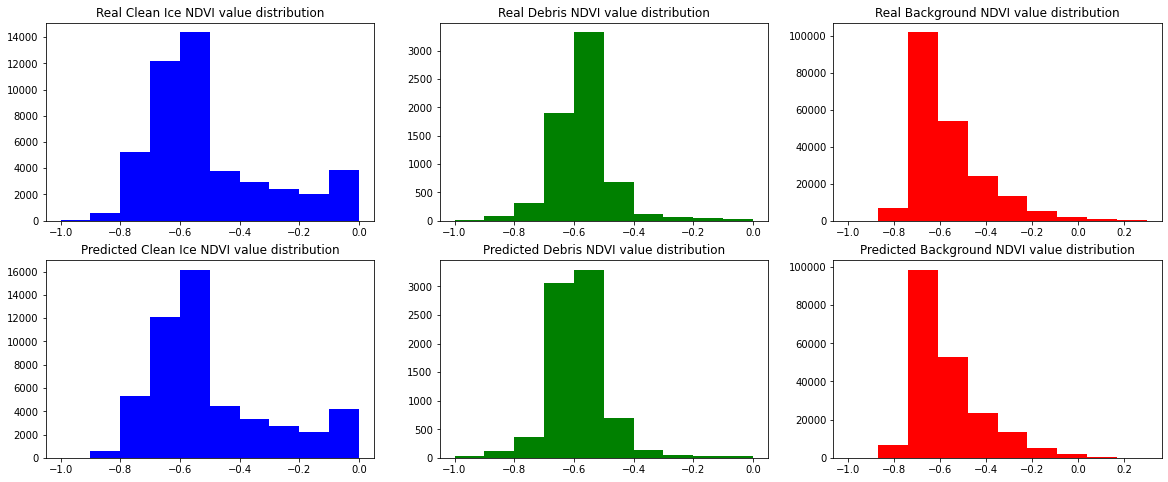

In [ ]:
import matplotlib.pyplot as plt
test_path = "/content/drive/MyDrive/Colab Notebooks/Tesi/glacier_mapping-master/datadrive/glaciers/processed"
true = 'masks'
pred = 'preds2/FPN'
img = 'test'
image = 'slice_20_img_041.npy'
path_mask = os.path.join(test_path,true,image.replace("img","mask"))
mask_open = np.load(path_mask)
print(image.replace("img","mask"), mask_open.shape)
path_pred = os.path.join(test_path,pred,image)
pred_open = np.load(path_pred)
print(image, pred_open.shape)
path_image = os.path.join(test_path,img,image)
img_open = np.load(path_image)
print(image, img_open.shape)
fig, ax = plt.subplots(2,3,figsize=(20,8))
ax[0,0].hist(minmax_scale(img_open[mask_open[...,0]==1][:,10], feature_range=(-1, 0)), color="blue")
ax[0,0].set_title("Real Clean Ice NDVI value distribution",fontsize=12)
ax[0,1].hist(minmax_scale(img_open[mask_open[...,1]==1][:,10], feature_range=(-1, 0)), color="green")
ax[0,1].set_title("Real Debris NDVI value distribution",fontsize=12)
ax[0,2].hist(minmax_scale(img_open[mask_open[...,2]==1][:,10], feature_range=(-1, 0.3)), color="red")
ax[0,2].set_title("Real Background NDVI value distribution",fontsize=12)
ax[1,0].hist(minmax_scale(img_open[pred_open==0][:,10], feature_range=(-1, 0)), color="blue")
ax[1,0].set_title("Predicted Clean Ice NDVI value distribution",fontsize=12)
ax[1,1].hist(minmax_scale(img_open[pred_open==1][:,10], feature_range=(-1, 0)), color="green")
ax[1,1].set_title("Predicted Debris NDVI value distribution",fontsize=12)
ax[1,2].hist(minmax_scale(img_open[pred_open==2][:,10], feature_range=(-1, 0.3)), color="red")
ax[1,2].set_title("Predicted Background NDVI value distribution",fontsize=12)
'''ax[2,0].hist(img_open[pred_open==0][:,10], color="blue")
ax[2,0].set_title("Predicted Clean Ice NDVI value distribution",fontsize=12)
ax[2,1].hist(img_open[pred_open==1][:,10], color="green")
ax[2,1].set_title("Predicted Debris NDVI value distribution",fontsize=12)
ax[2,2].hist(img_open[pred_open==2][:,10], color="red")
ax[2,2].set_title("Predicted Background NDVI value distribution",fontsize=12)'''
plt.show()

## Wheater Data

These cells of code are used to try the weather data extraction script that has 
been included in the script above.

In [ ]:
# Replace the file name in quote by the file name of the netcdf file (.nc) you want to convert to csv
netcdf_file_name = 'prova4.nc'

In [ ]:
# Set variables names for the input file.nc (netcdf_file_in) and the output file.csv (`csv_file_out`)
netcdf_file_in = local_storage_directory + netcdf_file_name
csv_file_out = local_storage_directory + netcdf_file_name[:-3] + '.csv'

weather_dict = dict()
weather_list = list()

In [ ]:
ds = xr.open_dataset(netcdf_file_in)
df = ds.to_dataframe()

In [ ]:
# Conversion from Farhenite to Celsius
var_name = 't2m'
if var_name:
    df[var_name] = df[var_name].apply(lambda x: x - 273,15)

In [ ]:
# Compute the mean temperature, the max temperature and the min temperature over the whole day
max = df[var_name].max()
min = df[var_name].min()
mean = df[var_name].mean()

In [ ]:
df.drop('t2m', inplace=True, axis=1)
df['MeanTemp']=mean
df['MaxTemp']=max
df['MinTemp']=min
df1 = df[0:1]
print(df1)
df1.to_csv(csv_file_out)

The next cell has been used to save prediction images with a legend

In [ ]:
test_path = "/content/drive/MyDrive/Colab Notebooks/Tesi/glacier_mapping-master/datadrive/glaciers/processed"
pred = 'preds2/FPN'
legend = test_path + '/pred_legend/FPN/'

pred_png = sorted(os.listdir(os.path.join(test_path,pred)))

if not os.path.exists(legend):
    os.makedirs(legend)

#for image in names_images[0:1]:
for image in pred_png:

    path_pred = os.path.join(test_path,pred,image)
    pred_open = np.load(path_pred)
    print(image, pred_open.shape)

    filename = image.split("/")[-1].replace("npy","png")
    plt.imshow(pred_open)

    ice = mpatches.Patch(color='#440154', label='Clean Ice')
    debris = mpatches.Patch(color='#208f8b', label='Debris Covered Ice')
    back = mpatches.Patch(color='#fde724', label='Background')

    plt.legend(handles=[ice, debris, back],loc="upper left")
    plt.savefig(f"{legend}{filename}")
    plt.close()
